In [20]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision 
import torchvision.transforms as transforms


In [21]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5) ,(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,
                                      download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data' ,train=False,
                                      download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False,num_workers=2
                                        )

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Files already downloaded and verified
Files already downloaded and verified


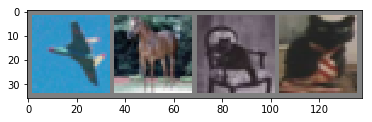

plane horse   cat   cat


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [41]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5 , 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2)
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [10]:
params = list(net.parameters())
print(len(params))
for i in range(len(params)):
    print(params[i].size())


10
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [43]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters() , lr = 0.001 , momentum=0.9)

for epoch in range(2):
    
    running_loss= 0.0 
    for i , data in enumerate(trainloader,0): 
        inputs , labels =data 
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs , labels)
        loss.backward()
        optimizer.step()

        #print statistics
        running_loss+=loss.item()
        if i%2000==1999:
            print('[%d, %5d] loss: %.3f' %
                 (epoch +1 , i+1 , running_loss/2000))
            running_loss = 0.0 
            
print('Finish training')

[1,  2000] loss: 1.254
[1,  4000] loss: 1.257
[1,  6000] loss: 1.232
[1,  8000] loss: 1.235
[1, 10000] loss: 1.224
[1, 12000] loss: 1.219
[2,  2000] loss: 1.134
[2,  4000] loss: 1.133
[2,  6000] loss: 1.151
[2,  8000] loss: 1.158
[2, 10000] loss: 1.139
[2, 12000] loss: 1.146
Finish training


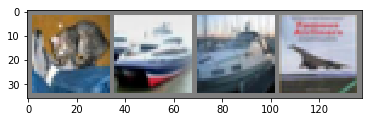

GroundTruth:    cat  ship  ship plane


In [44]:
dataiter = iter(testloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [45]:
outputs = net(images)

In [49]:
_ , predicted = torch.max(outputs,1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog   car  ship plane


In [50]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [51]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 66 %
Accuracy of  bird : 39 %
Accuracy of   cat : 28 %
Accuracy of  deer : 48 %
Accuracy of   dog : 59 %
Accuracy of  frog : 83 %
Accuracy of horse : 61 %
Accuracy of  ship : 74 %
Accuracy of truck : 75 %
